<a href="https://colab.research.google.com/github/feiduobaby/good-first-issue/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 导入数据

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions files -c jane-street-real-time-market-data-forecasting

Next Page Token = CfDJ8J1i-7MzxEhBg3BSP9qFZm-non800QItceaXf2eopb6U3vzR_BvE94IfDlO-PNEn0SdA_0llTN__3OHIUpV5ZtYMy7AbKf846kB62rfPH5eoAQwNDlL2hL3tx1LTylguibiScmXjkdmbfJzISnegR4tau8t6ILHopOe71FW6__bdwf2ytGI
name                                                                  size  creationDate                
--------------------------------------------------------------  ----------  --------------------------  
features.csv                                                          8857  2025-03-05 17:28:23.785000  
kaggle_evaluation/__init__.py                                          708  2025-03-05 17:28:23.772000  
kaggle_evaluation/core/__init__.py                                      83  2025-03-05 17:28:23.812000  
kaggle_evaluation/core/base_gateway.py                               14744  2025-03-05 17:28:23.827000  
kaggle_evaluation/core/generated/__init__.py                            83  2025-03-05 17:28:23.840000  
kaggle_evaluation/core/generated/kaggle_evaluation_pb2.py      

In [ ]:
pip install kaggle==1.5.12

In [ ]:
cd ../partition_id=3/

/content/train.parquet/partition_id=3


In [ ]:
!kaggle competitions download -c jane-street-real-time-market-data-forecasting -f train.parquet/partition_id=3/part-0.parquet

100% 999M/0.98G [00:07<00:00, 155MB/s]
100% 0.98G/0.98G [00:07<00:00, 133MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp -r /content/drive/MyDrive/janestreet /content/

2. EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
PATH = '/content/janestreet'

features = pd.read_csv(f'{PATH}/features.csv')
train_feat = pd.read_parquet(f'{PATH}/train.parquet/partition_id=1/part-0.parquet')
test_feat = pd.read_parquet(f'{PATH}/test.parquet/date_id=0/part-0.parquet')

In [24]:
print(features.isnull().values.any())
print(train_feat.isnull().sum()[train_feat.isnull().sum() > 0])
print(test_feat.isnull().sum()[test_feat.isnull().sum() > 0])

False
feature_00    1237842
feature_01    1237842
feature_02    1237842
feature_03    1237842
feature_04    1237842
feature_15      79289
feature_16         41
feature_17      13267
feature_18         29
feature_19         29
feature_21    2804247
feature_26    2804247
feature_27    2804247
feature_31    2804247
feature_32      31455
feature_33      31455
feature_39     432555
feature_40      14839
feature_41     102456
feature_42     432555
feature_43      14839
feature_44     102456
feature_45      90060
feature_46      90060
feature_50     422784
feature_51       3303
feature_52      92484
feature_53     422784
feature_54       3303
feature_55      92484
feature_56         29
feature_57         29
feature_58      31455
feature_62      81824
feature_63      63159
feature_64      66018
feature_65      90060
feature_66      90060
feature_73      31455
feature_74      31455
feature_75         46
feature_76         46
dtype: int64
feature_15    39
feature_17    39
feature_21     1
featur

In [ ]:
features.head(2)

,feature,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,feature_00,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,feature_01,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True


In [ ]:
train_feat.head(2)

,date_id,time_id,symbol_id,weight,feature_00,feature_01,feature_02,feature_03,feature_04,feature_05,...,feature_78,responder_0,responder_1,responder_2,responder_3,responder_4,responder_5,responder_6,responder_7,responder_8
0,170,0,0,2.112212,NaN,NaN,NaN,NaN,NaN,1.060330,...,-0.421823,-0.293646,-0.061842,-0.305413,-0.419151,-0.111796,-0.535104,-0.044332,-0.039061,-0.744789
1,170,0,1,2.760715,NaN,NaN,NaN,NaN,NaN,0.482468,...,3.111076,-0.075267,-0.359360,-1.270054,-0.018332,-0.040286,-1.417509,0.085840,0.487232,-0.124533


In [ ]:
test_feat.head(2)

,row_id,date_id,time_id,symbol_id,weight,is_scored,feature_00,feature_01,feature_02,feature_03,...,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78
0,0,0,0,0,3.169998,False,0.0,0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,NaN,NaN,0.0,0.0,-0.0,-0.0
1,1,0,0,1,2.165993,False,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,-0.0,NaN,NaN,0.0,0.0,0.0,0.0


<Axes: >

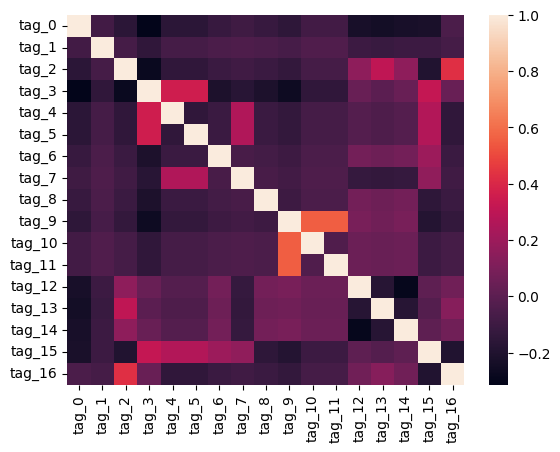

In [ ]:
sns.heatmap(features.set_index('feature').corr())

<Axes: ylabel='Frequency'>

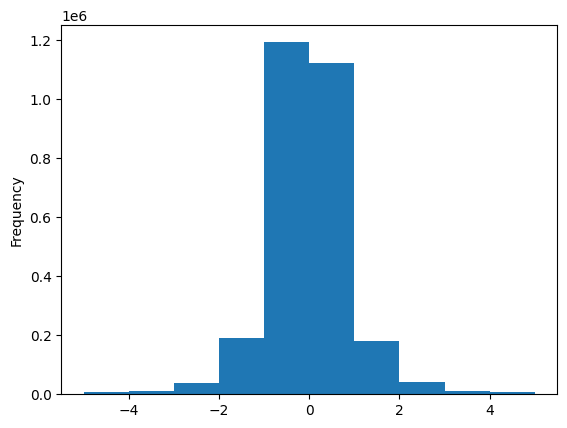

In [ ]:
train_feat['responder_6'].plot(kind='hist')

In [ ]:
train_feat.isnull().mean()

,0
date_id,0.000000
time_id,0.000000
symbol_id,0.000000
weight,0.000000
feature_00,0.441417
...,...
responder_4,0.000000
responder_5,0.000000
responder_6,0.000000
responder_7,0.000000


<Axes: >

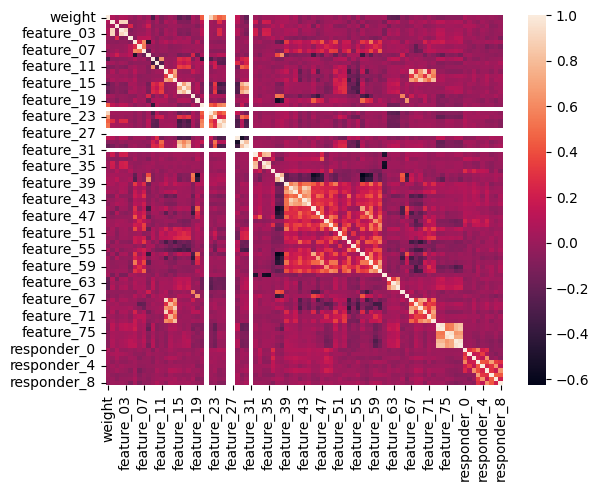

In [ ]:
sns.heatmap(train_feat.sample(1000).iloc[:, 3:].corr())

<Axes: >

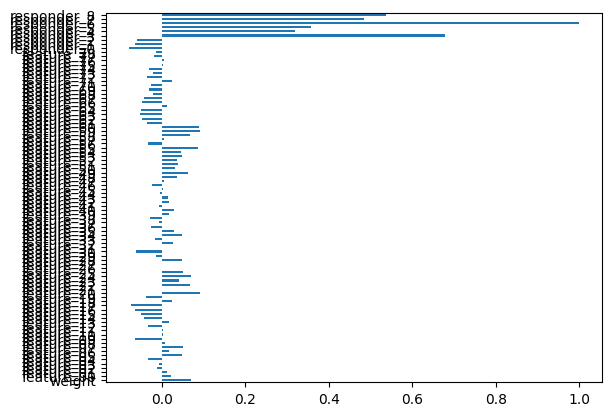

In [ ]:
train_feat.sample(1000).iloc[:, 3:].corr().responder_6.plot(kind='barh')